In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [190]:
ratings = pd.read_csv('ratings.csv')
ratings.head(5)

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,tt0100814,7,15-07-21,Tremors,https://www.imdb.com/title/tt0100814/,movie,7.1,96.0,1990,"Comedy, Horror",143582,19-01-90,Ron Underwood
1,tt1028532,7,05-04-21,Hachi: A Dog's Tale,https://www.imdb.com/title/tt1028532/,movie,8.1,93.0,2009,"Biography, Drama, Family",295970,13-06-09,Lasse Hallström
2,tt0102926,6,27-04-21,The Silence of the Lambs,https://www.imdb.com/title/tt0102926/,movie,8.6,118.0,1991,"Crime, Drama, Thriller",1472178,30-01-91,Jonathan Demme
3,tt1033575,6,15-07-21,The Descendants,https://www.imdb.com/title/tt1033575/,movie,7.3,115.0,2011,"Comedy, Drama",245809,02-09-11,Alexander Payne
4,tt1037705,7,15-07-21,The Book of Eli,https://www.imdb.com/title/tt1037705/,movie,6.8,118.0,2010,"Action, Adventure, Drama, Thriller",327789,11-01-10,"Allen Hughes, Albert Hughes"


In [191]:
df = ratings.loc[:, ['Title','Your Rating', 'Date Rated', 'Title Type','IMDb Rating', 'Runtime (mins)', 'Year', 'Genres', 'Num Votes', 'Release Date', 'Directors']]

In [192]:
df.isnull().sum()

Title              0
Your Rating        0
Date Rated         0
Title Type         0
IMDb Rating        0
Runtime (mins)     1
Year               0
Genres             0
Num Votes          0
Release Date       2
Directors         11
dtype: int64

In [193]:
column_info = pd.DataFrame({
    'Column': df.columns,
    'dtype': df.dtypes,
    'Unique Values': df.nunique()
}).reset_index(drop=True)

column_info

,Column,dtype,Unique Values
0,Title,object,462
1,Your Rating,int64,9
2,Date Rated,object,56
3,Title Type,object,8
4,IMDb Rating,float64,50
5,Runtime (mins),float64,103
6,Year,int64,42
7,Genres,object,208
8,Num Votes,int64,463
9,Release Date,object,441


### Plots to understand columns

In [194]:
df['Title Type'].value_counts()

movie            447
tvSeries           8
tvSpecial          2
tvMiniSeries       2
video              1
podcastSeries      1
tvShort            1
tvEpisode          1
Name: Title Type, dtype: int64

Text(0, 0.5, 'Count')

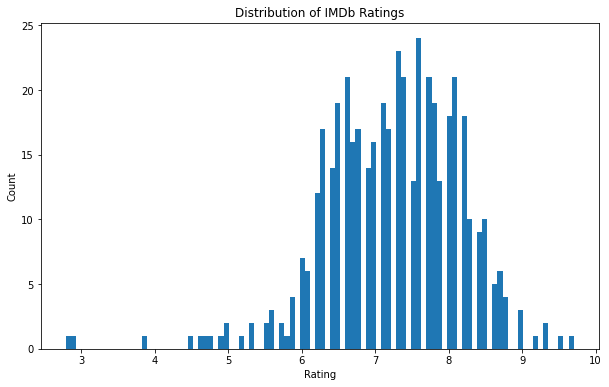

In [195]:
df['IMDb Rating'].plot(kind='hist', bins=100, figsize=(10, 6))
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

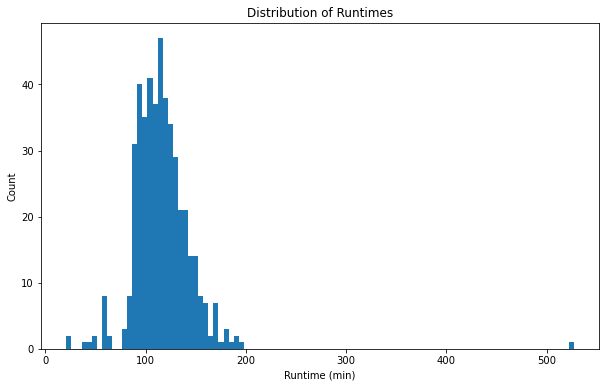

In [196]:
df['Runtime (mins)'].plot(kind='hist', bins=100, figsize=(10, 6))
plt.title('Distribution of Runtimes')
plt.xlabel('Runtime (min)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

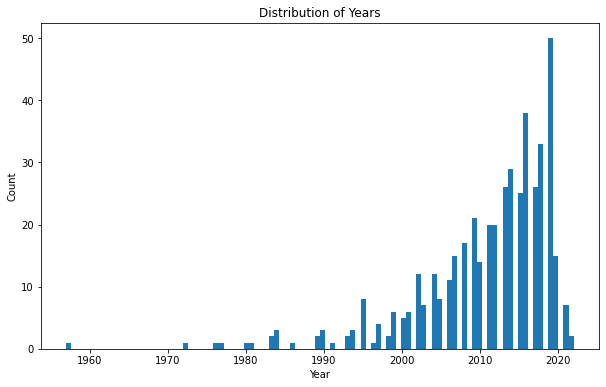

In [197]:
df['Year'].plot(kind='hist', bins=100, figsize=(10, 6))
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Count')

#### Plot Datetimes

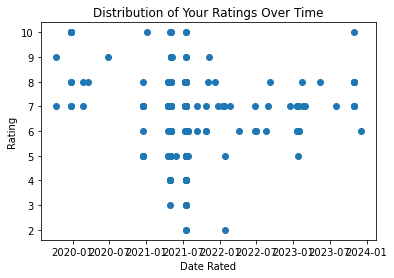

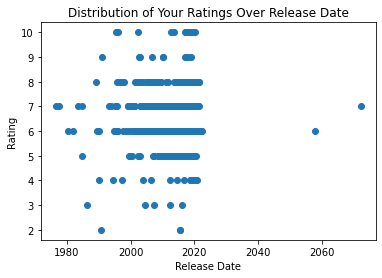

In [198]:
df['Date Rated dt'] = pd.to_datetime(df['Date Rated'])
df['Release Date dt'] = pd.to_datetime(df['Release Date'])
df_timeseries = df.set_index('Date Rated dt').sort_index()

plt.scatter(df_timeseries.index, df_timeseries['Your Rating'])
plt.title('Distribution of Your Ratings Over Time')
plt.xlabel('Date Rated')
plt.ylabel('Rating')
plt.show()

df_timeseries = df.set_index('Release Date dt').sort_index()
plt.scatter(df_timeseries.index, df['Your Rating'])
plt.title('Distribution of Your Ratings Over Release Date')
plt.xlabel('Release Date')
plt.ylabel('Rating')
plt.show()

In [199]:
## Extract year and month information from datetimes

df['Date Rated Year'] = df['Date Rated dt'].dt.year
df['Date Rated Month'] = df['Date Rated dt'].dt.month
df['Release Date Year'] = df['Release Date dt'].dt.year
df['Release Date Month'] = df['Release Date dt'].dt.month
df.head(5)

,Title,Your Rating,Date Rated,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Date Rated dt,Release Date dt,Date Rated Year,Date Rated Month,Release Date Year,Release Date Month
0,Tremors,7,15-07-21,movie,7.1,96.0,1990,"Comedy, Horror",143582,19-01-90,Ron Underwood,2021-07-15,1990-01-19,2021,7,1990.0,1.0
1,Hachi: A Dog's Tale,7,05-04-21,movie,8.1,93.0,2009,"Biography, Drama, Family",295970,13-06-09,Lasse Hallström,2021-05-04,2009-06-13,2021,5,2009.0,6.0
2,The Silence of the Lambs,6,27-04-21,movie,8.6,118.0,1991,"Crime, Drama, Thriller",1472178,30-01-91,Jonathan Demme,2021-04-27,1991-01-30,2021,4,1991.0,1.0
3,The Descendants,6,15-07-21,movie,7.3,115.0,2011,"Comedy, Drama",245809,02-09-11,Alexander Payne,2021-07-15,2011-02-09,2021,7,2011.0,2.0
4,The Book of Eli,7,15-07-21,movie,6.8,118.0,2010,"Action, Adventure, Drama, Thriller",327789,11-01-10,"Allen Hughes, Albert Hughes",2021-07-15,2010-11-01,2021,7,2010.0,11.0


### Generate distinct columns for Genres

In [200]:
df['Genres'].value_counts()

Drama                                                                   18
Action, Adventure, Sci-Fi                                               16
Action, Adventure, Fantasy, Sci-Fi                                      15
Comedy                                                                  15
Comedy, Drama                                                           14
                                                                        ..
Biography, Crime, Drama, History, Mystery                                1
Animation, Action, Adventure, Comedy, Crime, Family, Mystery, Sci-Fi     1
Action, Adventure, Drama, Sci-Fi, Thriller                               1
Animation, Adventure, Comedy, Drama, Family, Fantasy                     1
Comedy, Family                                                           1
Name: Genres, Length: 208, dtype: int64

In [201]:
df['Genres Split'] = df.apply(lambda x: [part.strip() for part in x['Genres'].split(',')], axis=1)
df.head(5)

,Title,Your Rating,Date Rated,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Date Rated dt,Release Date dt,Date Rated Year,Date Rated Month,Release Date Year,Release Date Month,Genres Split
0,Tremors,7,15-07-21,movie,7.1,96.0,1990,"Comedy, Horror",143582,19-01-90,Ron Underwood,2021-07-15,1990-01-19,2021,7,1990.0,1.0,"[Comedy, Horror]"
1,Hachi: A Dog's Tale,7,05-04-21,movie,8.1,93.0,2009,"Biography, Drama, Family",295970,13-06-09,Lasse Hallström,2021-05-04,2009-06-13,2021,5,2009.0,6.0,"[Biography, Drama, Family]"
2,The Silence of the Lambs,6,27-04-21,movie,8.6,118.0,1991,"Crime, Drama, Thriller",1472178,30-01-91,Jonathan Demme,2021-04-27,1991-01-30,2021,4,1991.0,1.0,"[Crime, Drama, Thriller]"
3,The Descendants,6,15-07-21,movie,7.3,115.0,2011,"Comedy, Drama",245809,02-09-11,Alexander Payne,2021-07-15,2011-02-09,2021,7,2011.0,2.0,"[Comedy, Drama]"
4,The Book of Eli,7,15-07-21,movie,6.8,118.0,2010,"Action, Adventure, Drama, Thriller",327789,11-01-10,"Allen Hughes, Albert Hughes",2021-07-15,2010-11-01,2021,7,2010.0,11.0,"[Action, Adventure, Drama, Thriller]"


In [202]:
encoded_columns = pd.get_dummies(df['Genres Split'].apply(pd.Series).stack()).sum(level=0)

# Concatenate encoded columns with the original DataFrame
df = pd.concat([df, encoded_columns], axis=1)
df.head(5)

C:\Users\batuk\AppData\Local\Temp/ipykernel_12636/2855483109.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  encoded_columns = pd.get_dummies(df['Genres Split'].apply(pd.Series).stack()).sum(level=0)


,Title,Your Rating,Date Rated,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Tremors,7,15-07-21,movie,7.1,96.0,1990,"Comedy, Horror",143582,19-01-90,...,0,0,0,0,0,0,0,0,0,0
1,Hachi: A Dog's Tale,7,05-04-21,movie,8.1,93.0,2009,"Biography, Drama, Family",295970,13-06-09,...,0,0,0,0,0,0,0,0,0,0
2,The Silence of the Lambs,6,27-04-21,movie,8.6,118.0,1991,"Crime, Drama, Thriller",1472178,30-01-91,...,0,0,0,0,0,0,0,1,0,0
3,The Descendants,6,15-07-21,movie,7.3,115.0,2011,"Comedy, Drama",245809,02-09-11,...,0,0,0,0,0,0,0,0,0,0
4,The Book of Eli,7,15-07-21,movie,6.8,118.0,2010,"Action, Adventure, Drama, Thriller",327789,11-01-10,...,0,0,0,0,0,0,0,1,0,0


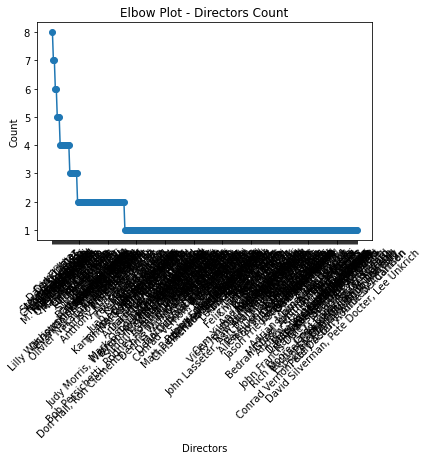

In [203]:
directors_count = df['Directors'].value_counts()

plt.plot(directors_count.index, directors_count.values, marker='o')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.title('Elbow Plot - Directors Count')
plt.xticks(rotation=45)
plt.show()

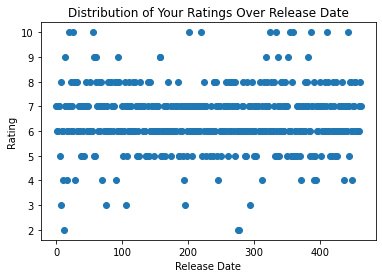

In [204]:
plt.scatter(df.index, df['Your Rating'])
plt.title('Distribution of Your Ratings Over Release Date')
plt.xlabel('Release Date')
plt.ylabel('Rating')
plt.show()

In [205]:
directors_remark = directors_count[directors_count > 3].index.tolist()
df['DirectorRemark'] = df['Directors'].apply(lambda x: 1 if x in directors_remark else 0)

### One-Hot Encoding for titles

In [206]:
### One Hot Encoding Title Type

# Perform one-hot encoding
encoded_columns = pd.get_dummies(df['Title Type'], prefix='Title')

# Concatenate encoded columns with the original DataFrame
df = pd.concat([df, encoded_columns], axis=1)
df.head(5)

,Title,Your Rating,Date Rated,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,...,Western,DirectorRemark,Title_movie,Title_podcastSeries,Title_tvEpisode,Title_tvMiniSeries,Title_tvSeries,Title_tvShort,Title_tvSpecial,Title_video
0,Tremors,7,15-07-21,movie,7.1,96.0,1990,"Comedy, Horror",143582,19-01-90,...,0,0,1,0,0,0,0,0,0,0
1,Hachi: A Dog's Tale,7,05-04-21,movie,8.1,93.0,2009,"Biography, Drama, Family",295970,13-06-09,...,0,0,1,0,0,0,0,0,0,0
2,The Silence of the Lambs,6,27-04-21,movie,8.6,118.0,1991,"Crime, Drama, Thriller",1472178,30-01-91,...,0,0,1,0,0,0,0,0,0,0
3,The Descendants,6,15-07-21,movie,7.3,115.0,2011,"Comedy, Drama",245809,02-09-11,...,0,0,1,0,0,0,0,0,0,0
4,The Book of Eli,7,15-07-21,movie,6.8,118.0,2010,"Action, Adventure, Drama, Thriller",327789,11-01-10,...,0,0,1,0,0,0,0,0,0,0


In [207]:
df.dropna(inplace=True)
df.isnull().sum()

Title                  0
Your Rating            0
Date Rated             0
Title Type             0
IMDb Rating            0
Runtime (mins)         0
Year                   0
Genres                 0
Num Votes              0
Release Date           0
Directors              0
Date Rated dt          0
Release Date dt        0
Date Rated Year        0
Date Rated Month       0
Release Date Year      0
Release Date Month     0
Genres Split           0
Action                 0
Adventure              0
Animation              0
Biography              0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Family                 0
Fantasy                0
History                0
Horror                 0
Music                  0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Short                  0
Sport                  0
Thriller               0
War                    0
Western                0


In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Your Rating'], df['Your Rating'], test_size=0.2, random_state=42)

## Regression Models

In [209]:
#### Choose features for regression models

features = ['IMDb Rating','Runtime (mins)', 'Num Votes', 'DirectorRemark','Title_movie', 'Title_tvSeries', 'Title_tvSpecial', 'Title_video',  'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',  'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']
X_train = X_train[features]
X_test = X_test[features]

#### Linear Regression

MAPE for training w/ linear regression: 0.14469741827591523
MAPE for test w/ linear regression: 0.14213006748284077


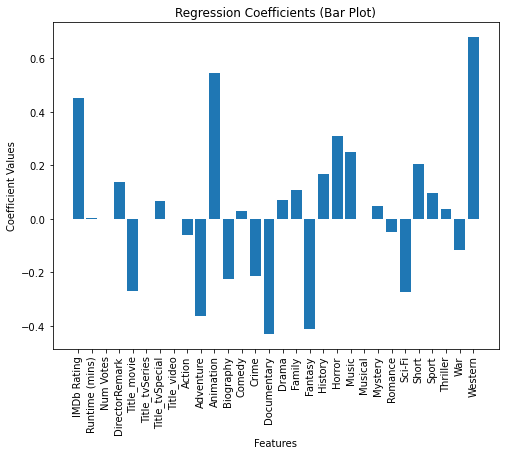

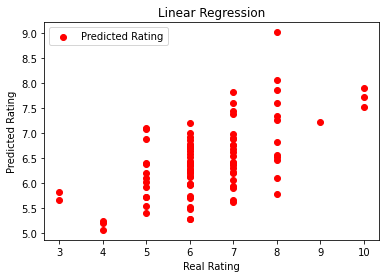

In [242]:
def linear_regression(df, X_train, X_test, y_train, y_test):
    model = LinearRegression()
    scores = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=5)
    mean_error = np.mean(scores)
    print("MAPE for linear regression training:", mean_error)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print("MAPE for linear regression testing:", mape)

    return model

def regression_report(model, X_train, X_test, y_test, y_pred, df):
    coefficients = model.coef_
    feature_names = X_train.columns  # Replace with your actual feature names
    y_pred = model.predict(X_test)
    # Plot the regression coefficients as a bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, coefficients)
    plt.xlabel('Features')
    plt.ylabel('Coefficient Values')
    plt.title('Regression Coefficients (Bar Plot)')
    plt.xticks(rotation=90)
    plt.show()
    plt.scatter(y_test, y_pred, color='red', label='Predicted Rating')
    plt.xlabel('Real Rating')
    plt.ylabel('Predicted Rating')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()
    

model = linear_regression(df, X_train, X_test, y_train, y_test)
df['Prediction_LinearReg'] = model.predict(df[features])
regression_report(model, X_train, X_test, y_test, y_pred, df)

### Ridge Regression

[I 2023-06-27 22:44:31,817] A new study created in memory with name: RidgeRegression
[I 2023-06-27 22:44:31,840] Trial 0 finished with value: -0.15702745874398463 and parameters: {'alpha': 0.0006236874609894487, 'solver': 'lsqr'}. Best is trial 0 with value: -0.15702745874398463.
[I 2023-06-27 22:44:31,871] Trial 1 finished with value: -0.15701429167540376 and parameters: {'alpha': 0.04309635060372966, 'solver': 'saga'}. Best is trial 1 with value: -0.15701429167540376.
[I 2023-06-27 22:44:31,902] Trial 2 finished with value: -0.14102751477927217 and parameters: {'alpha': 3.6649364131126174, 'solver': 'auto'}. Best is trial 2 with value: -0.14102751477927217.
[I 2023-06-27 22:44:31,932] Trial 3 finished with value: -0.14299799114822465 and parameters: {'alpha': 2.8499770018434458e-05, 'solver': 'auto'}. Best is trial 2 with value: -0.14102751477927217.
[I 2023-06-27 22:44:31,964] Trial 4 finished with value: -0.14299409289938772 and parameters: {'alpha': 0.0021893656482095047, 'solver'

Best parameters for ridge regression {'alpha': 9.979373413844796, 'solver': 'svd'}
Best MAPE score for ridge regression training: 0.14051619258998022
MAPE for ridge regression testing: 0.13961457763772497


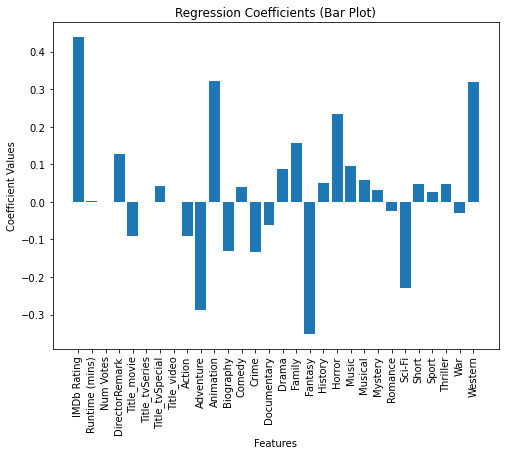

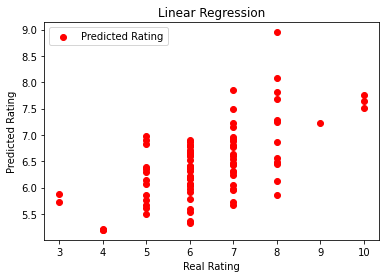

In [251]:
import warnings
import optuna
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Ridge

# Ignore all warnings
warnings.filterwarnings("ignore")

def ridge_regression(df, X_train, X_test, y_train, y_test):

    def objective(trial):
        param = {
            'alpha' : trial.suggest_loguniform('alpha', 1e-5, 10.0),
            'solver' : trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga'])
        }
        model = Ridge(**param)
        scores = cross_val_score(model, X_train, y_train, 
                                 cv=KFold(n_splits=5,
                                          shuffle=True,
                                          random_state=42),
                                 scoring='neg_mean_absolute_percentage_error'
                                ) # Train set is split into 3 folds, the model is trained on 2 folds and evaluated on the remaining fold. This is repeated 3 times, and the average of the 3 scores is returned.
        # Return the mean of 3 scores
        return scores.mean()
    
    study = optuna.create_study(direction='maximize', study_name='RidgeRegression')
    study.optimize(objective, n_trials=50) # n_trials is the number of trials to run, each run is evaluated by cross validation score
    
    print('Best parameters for ridge regression', study.best_params)
    print('Best MAPE score for ridge regression training:', -1*study.best_value)
    
    model = Ridge(**study.best_params)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print("MAPE for ridge regression testing:", mape)

    return model

model = ridge_regression(df, X_train, X_test, y_train, y_test)
df['Prediction_RidgeReg'] = model.predict(df[features])
regression_report(model, X_train, X_test, y_test, y_pred, df)


[I 2023-06-27 22:52:40,156] A new study created in memory with name: RidgeRegression
[I 2023-06-27 22:52:40,183] Trial 0 finished with value: -0.15702754164971683 and parameters: {'alpha': 3.9494950956771913, 'selection': 'random'}. Best is trial 0 with value: -0.15702754164971683.
[I 2023-06-27 22:52:40,215] Trial 1 finished with value: -0.14288918653265448 and parameters: {'alpha': 4.9277230303159867e-05, 'selection': 'cyclic'}. Best is trial 1 with value: -0.14288918653265448.
[I 2023-06-27 22:52:40,244] Trial 2 finished with value: -0.1432091874889207 and parameters: {'alpha': 0.025872770472605604, 'selection': 'cyclic'}. Best is trial 1 with value: -0.14288918653265448.
[I 2023-06-27 22:52:40,287] Trial 3 finished with value: -0.14503570189031342 and parameters: {'alpha': 0.06363056316687257, 'selection': 'random'}. Best is trial 1 with value: -0.14288918653265448.
[I 2023-06-27 22:52:40,323] Trial 4 finished with value: -0.1421593266140324 and parameters: {'alpha': 0.000940461966

Best parameters for lasso regression {'alpha': 0.00569721350891957, 'selection': 'random'}
Best MAPE score for lasso regression training: 0.1409002460378582
MAPE for lasso regression testing: 0.13918559526857252


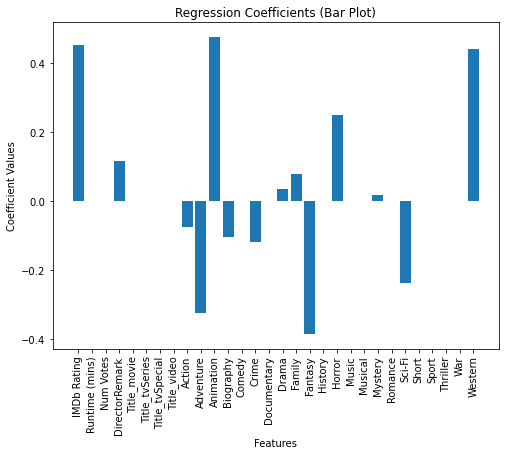

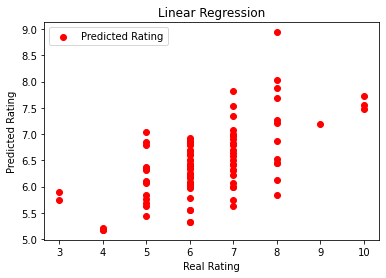

In [256]:
### Lasso Regression

import warnings
import optuna
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Lasso

# Ignore all warnings
warnings.filterwarnings("ignore")

def lasso_regression(df, X_train, X_test, y_train, y_test):

    def objective(trial):
        param = {
            'alpha' : trial.suggest_loguniform('alpha', 1e-5, 10.0),
            'selection' : trial.suggest_categorical('selection', ['cyclic', 'random'])
        }
        model = Lasso(**param)
        scores = cross_val_score(model, X_train, y_train, 
                                 cv=KFold(n_splits=5,
                                          shuffle=True,
                                          random_state=42),
                                 scoring='neg_mean_absolute_percentage_error'
                                ) # Train set is split into 3 folds, the model is trained on 2 folds and evaluated on the remaining fold. This is repeated 3 times, and the average of the 3 scores is returned.
        # Return the mean of 3 scores
        return scores.mean()
    
    study = optuna.create_study(direction='maximize', study_name='RidgeRegression')
    study.optimize(objective, n_trials=50) # n_trials is the number of trials to run, each run is evaluated by cross validation score
    
    print('Best parameters for lasso regression', study.best_params)
    print('Best MAPE score for lasso regression training:', -1*study.best_value)
    
    model = Lasso(**study.best_params)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print("MAPE for lasso regression testing:", mape)

    return model

model = lasso_regression(df, X_train, X_test, y_train, y_test)
df['Prediction_LassoReg'] = model.predict(df[features])
regression_report(model, X_train, X_test, y_test, y_pred, df)


## Tree Based Models